## Introduction:-

In [1]:
# I have selected No-show appointments datasets.It is a collection of information from 100k medical appointments in Braz, 
# The data shows patient information like their age,gender,neighbourhood,health.
# By using this datasets we can find out the different reason for no-show from patients.
# Que:1  Are patients not making it to their appointment due to failed sms delivery?
# Que:2  Which day has the highest no shows?
# Que:3  Which neighborhoods have the highest number of no-shows and shows? 

## Data Wrangling:-

In [2]:
#Import data analysis packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Load data from csv
df = pd.read_csv('KaggleV2-May-2016 - Copy (2).csv')

In [4]:
# Integrity check to see if there is any NULL data in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Integrity check to see if there is any naming or data type inconsistency in the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Observations
1. Changing patientID data type from float to int will make the dataset easier to work with
2. Stripping time from the scheduleDay column will make the dataset easier to work with
3. Stripping time from the appointmentDay column will make the dataset easier to work with

In [6]:
# Integrity check to see if there is any repeated appointment ID and patient Id.
df.loc[:, ['PatientId', 'AppointmentID']].nunique()

PatientId         62299
AppointmentID    110527
dtype: int64

In [7]:
#Integrity check to see if there is any duplicate data in the dataset
sum(df.duplicated())

0

## Data Cleaning:-

In [8]:
# Based on the observations made above, the below are steps taken to clean the data

In [9]:
# Change scheduleDay and appointment day column to datetime
datetime_change = ["ScheduledDay", "AppointmentDay"]
df[datetime_change]= df[datetime_change].apply(pd.to_datetime)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [11]:
# Create a appointmentDayOfWeek column for day analysis
df['appointmentDayOfWeek'] = df['AppointmentDay'].dt.day_name()

In [12]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,appointmentDayOfWeek
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [13]:
# Strip time from scheduleday and appointmentday since it has no time-level data
for column_name in datetime_change:
    df[column_name] = pd.to_datetime(df[column_name]).dt.date

In [14]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,appointmentDayOfWeek
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110526,3.775115e+14,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday


In [15]:
# Giving new column names for ease of use
newLabels = ['patientID',
             'appointmentID',
             'gender',
             'scheduleDay',
             'appointmentDay',
             'age',
             'neighborhood',
             'scholarship',
             'hypertension',
             'diabetes',
             'alcoholism',
             'handcap',
             'sms_received',
             'noshow',
             'appointmentDayOfWeek']
df.columns = newLabels

In [16]:
# To change patiendID data type from float to int
df['patientID'] = df['patientID'].astype(int)

In [17]:
# Integrity check to see data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   patientID             110527 non-null  int32 
 1   appointmentID         110527 non-null  int64 
 2   gender                110527 non-null  object
 3   scheduleDay           110527 non-null  object
 4   appointmentDay        110527 non-null  object
 5   age                   110527 non-null  int64 
 6   neighborhood          110527 non-null  object
 7   scholarship           110527 non-null  int64 
 8   hypertension          110527 non-null  int64 
 9   diabetes              110527 non-null  int64 
 10  alcoholism            110527 non-null  int64 
 11  handcap               110527 non-null  int64 
 12  sms_received          110527 non-null  int64 
 13  noshow                110527 non-null  object
 14  appointmentDayOfWeek  110527 non-null  object
dtypes: int32(1), int6

## Exploratory Data Analysis:-

# Are patients not making it to their appointment due to failed sms delivery?

In [18]:
# Convert noshow column to hold 1 if Yes, 0 otherwise
# This step is done to match data in other colums like sms recieved.
df['noshow'] = np.where((df.noshow == "Yes"), 1, 0)

In [19]:
df.head()

,patientID,appointmentID,gender,scheduleDay,appointmentDay,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,noshow,appointmentDayOfWeek
0,-2147483648,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday
1,-2147483648,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday
2,-2147483648,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday
3,-2147483648,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday
4,-2147483648,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday


In [20]:
# Create a dataframe to hold all Sms Received records
sms_received = df.query('sms_received == 1')
sms_received.shape

(35482, 15)

In [21]:
# Create a dataframe to hold all no Sms Received records
no_sms_received = df.query('sms_received == 0')
no_sms_received.shape

(75045, 15)

In [22]:
def get_percentage(query_str, df):
    filter_df = df.query(query_str)
    return len(filter_df) * 100 / len(df)

In [23]:
a = get_percentage('noshow == 1', sms_received)
b = get_percentage('noshow == 0', sms_received)
c = get_percentage('noshow == 1', no_sms_received)
d = get_percentage('noshow == 0', no_sms_received)

print (a, b, c, d)

27.574544839637 72.425455160363 16.703311346525417 83.29668865347458


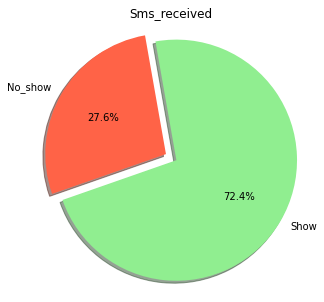

In [24]:
# visualization for shows and no shows when no SMS recieved
Size = [a, b]
labels = ['No_show','Show']
explode = (0, 0.1)

plt.pie(Size, explode=explode, labels=labels, colors=['tomato','lightgreen'],autopct='%1.1f%%', shadow=True, startangle=100)
plt.title('Sms_received')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

Visual distribution of appointment status when reminder messages are not received

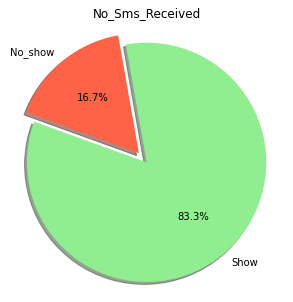

In [25]:
# visualization for shows and no shows when SMS recieved
Size = [c, d]
labels = ['No_show','Show']
explode = (0, 0.1)

plt.pie(Size, explode=explode, labels=labels, colors=['tomato','lightgreen'],autopct='%1.1f%%', shadow=True, startangle=100)
plt.title('No_Sms_Received')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

Visual distribution of appointment status when reminder messages are received

# Which day has the highest no shows?

In [26]:
#Create a dataframe to hold all no-show records
no_shows = df.query('noshow == 1')
no_shows.shape

(22319, 15)

In [27]:
# Function to determine percentage of no shows for a given day
def count_no_shows(df, no_shows, day):
    no_show_data = no_shows.query('appointmentDayOfWeek == @day').shape[0]
    percentage = ((no_show_data * 100.0) / no_shows.shape[0])
    return percentage

In [28]:
heights = []
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
for day in days:
    heights.append(count_no_shows(df, no_shows, day))

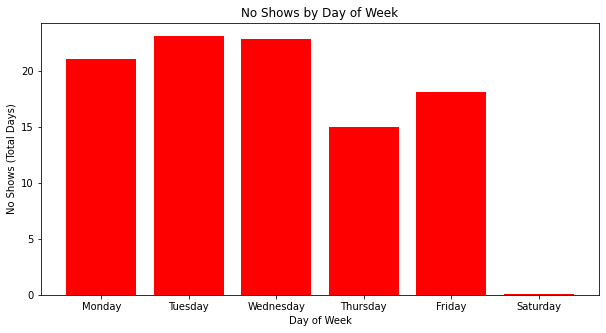

In [29]:
# visualization for no shows by day of week
locations = [i for i in range(6)]
labels = days
plt.bar(locations, heights, tick_label=labels, color='red')
plt.title('No Shows by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('No Shows (Total Days)')

fig = plt.gcf()
fig.set_size_inches(10,5);

Visual distribution of no-shows by day of week

# Which neighborhoods have the highest number of no-shows and shows?

In [30]:
# Data showing highest number of noshows from the neighborhood
noShowsNeighborhood = no_shows.groupby("neighborhood")["noshow"].count().reset_index(name="count").sort_values("count", ascending=False)
noShowsNeighborhood.head(10)

,neighborhood,count
38,JARDIM CAMBURI,1465
43,MARIA ORTIZ,1219
36,ITARARÉ,923
58,RESISTÊNCIA,906
10,CENTRO,703
40,JESUS DE NAZARETH,696
39,JARDIM DA PENHA,631
9,CARATOÍRA,591
77,TABUAZEIRO,573
8,BONFIM,550


Top 10 neighborhoods by no shows

In [33]:
#Create a dataframe to hold all show records
shows = df.query('noshow == 0')
shows.shape

(88208, 15)

In [34]:
# Data showing highest number of shows from the neighborhood
ShowsNeighborhood = shows.groupby("neighborhood")["noshow"].count().reset_index(name="count").sort_values("count", ascending=False)
ShowsNeighborhood.head(10)

,neighborhood,count
37,JARDIM CAMBURI,6252
42,MARIA ORTIZ,4586
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3246
65,SANTA MARTHA,2635
10,CENTRO,2631
35,ITARARÉ,2591
77,TABUAZEIRO,2559
68,SANTO ANTÔNIO,2262
8,BONFIM,2223


Top 10 neighborhoods by shows

## Conclusions:-

By seeing the above visuals,

Most of the patients are making their appointments even though no SMS received.
Appointment no-shows occurred the most on Tuesdays and wednesdays and the least on saturdays. It is difficult to draw any conclusions but we can say that we have more no shows on weekdays.
Neighborhood in which the appointment took place was charted to see if certain areas saw higher no-show rates. JARDIM CAMBURI and MARIA ORTIZ were the Top 2 neighborhoods in both the no-shows and shows segments. This is likely due to the population of these neighbhorhoods

Limitation:-
Overlaying external data sources onto this data set such as traffic, weather, or geographic data could allow us to better understand influencers on no-show rates. Right now, the analysis is limited to general correlations.
Patients with repeat no-shows would be a good cohort to remove from the analysis to understand environmental or health factors influencing no-shows. This was not done but could improve the integrity of the investigation.